# Data Analysis Report of SapJam Topic "ChatBot"
Dataset file: 2800 articles crawled from SapJam by Python Scrapy and Splash

In [1]:
from sqlalchemy import create_engine, distinct
from sqlalchemy.orm import sessionmaker
from sqlalchemy.sql import func

from JamScrapy import config
from JamScrapy.preprocess.entity import Post, People, Group
from utility import plt_pie

In [2]:
engine = create_engine(config.DB_CONNECT_STRING, max_overflow=5)
session = sessionmaker(bind=engine)()
posts = session.query(Post).filter(Post.body.isnot(None)).all()

print('Total posts:', len(posts))

Total posts: 2798


## Overview Jam Categories of Topic "ChatBot"

In [3]:
urls = []
for p in posts:
    # get post baseurl
    urls.append(p.baseurl.replace('http://jam4.sapjam.com/','').split('/')[0])
    
#print(urls)

urls_set = set(urls)
pie = {}
for item in urls_set:
    pie[item] = urls.count(item)
    
print(len(pie))    
print(pie)

10
{'blogs': 266, 'feed': 131, 'poll': 3, 'groups': 2224, 'tasks': 1, 'profile': 19, 'wiki': 124, 'ideas': 9, 'questions': 10, 'discussions': 11}


Most posts from 'groups': 2224, including 'documents' of 'groups': 2175 (97.8%)

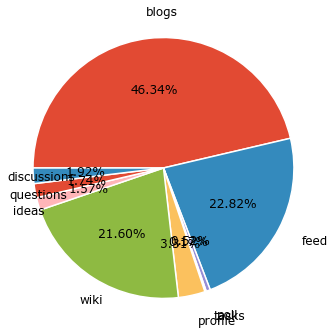

In [4]:
if 'groups' in pie:
    pie.pop('groups')
    
values = []
labels = []
for key in pie:
    if int(pie[key]) > 0:
        values.append(int(pie[key]))
        labels.append(key)
        
plt_pie(values, labels)

## Entity Extraction of People

In [5]:
engine = create_engine(config.DB_CONNECT_STRING, max_overflow=5)
session = sessionmaker(bind=engine)()
people = session.query(People).all()

print('total of', len(people), 'including 2 roles of [Creator] and [Participator]')

total of 6323 including 2 roles of [Creator] and [Participator]


### People perform as Creator

In [6]:
results = engine.execute('''select displayname, COUNT(displayname) as count from jam_people_from_post 
where roletype = 'creator' GROUP BY displayname order by count desc, displayname''').fetchall()
print('Distinct Creators:', len(results))

Distinct Creators: 1088


In [7]:
for r in results:
    if r[1] >= 5:
        print(r[0], ':', r[1])

Alumni : 234
Dante Alipio Jr : 46
Mathias Neid : 42
Geraldine Lim : 34
Dirk Kansky : 27
Alfred Wu : 20
Stephanie Muench : 19
Al Hilwa : 18
Susan Crawford : 15
Michael Laux : 14
Alain Dumas : 13
Ashutosh Uday Apte : 13
Gretchen Statler : 13
Regina Mattukat : 13
Sarah Kellman : 13
Steve Hamrick : 13
Kathleen O\'Brien : 12
Sina Moser : 12
Gail Moody-Byrd : 11
Jeff ALLEN : 11
Shanker Supramaniam : 11
Vicki Cui : 11
Wolfgang Bremer : 11
Carmelo Jr Villanueva : 10
Lisa Munzenmaier : 10
Renee Wilhelm : 10
Anna Sahagun : 9
Joni Wong Angkasa : 9
Kristin McMahon : 9
Marcel Lindsay : 9
Michael Renz : 9
Minal Shah : 9
Nam Ho Lee : 9
Raghav S : 9
Rosa Chamorro : 9
Charles Tigges : 8
Frank Godeby : 8
Gena Moore : 8
Jonas Israel : 8
Markus Meisl : 8
Milja Gillespie : 8
Pavel Balan : 8
Sarah BAILLOT : 8
Stephan Kamps : 8
Arunima Kumar : 7
ERICA VIALARDI : 7
Fernando Sanchez-Mayoral : 7
Francis Lui : 7
Joerg Fuetterer : 7
Jorge Granada : 7
Kirsten Zuercher : 7
Morgan Jiang : 7
Nadine Glasstetter : 7
Oa

### People perform as Participator

In [8]:
results = engine.execute('''select displayname, COUNT(displayname) as count from jam_people_from_post 
where roletype = 'participator' and position <> -1 GROUP BY displayname order by count desc, displayname''').fetchall()
print('Distinct Participators:', len(results))

Distinct Participators: 459


In [9]:
for r in results:
    if r[1] >= 5:
        print(r[0], ':', r[1])

Alumni : 37
Kathleen O\'Brien : 21
Julien Grisha Quester-Semeon : 20
Thomas Brodkorb : 14
Eric Cholankeril : 11
Jacky Cheng : 9
Jim Smith : 9
Magen Mintchev : 9
Charl Gokbayrak : 8
Dante Alipio Jr : 8
Nikolay Dimitrov : 8
CLARA FAVILLA : 7
Cristina Ricaurte : 7
Florian Albrecht : 7
Lynsey Turnbull : 7
Marlyn Zelkowitz : 7
Wendy Peacock : 7
Geoffrey Mantel : 6
Ji-Hyun Ahn : 6
Akash Winny : 5
Bart Mooren : 5
Bernhard Luecke : 5
Ginger Gatling : 5
Joseph Wong : 5
Kelsey Bourque : 5
Lee Barnard : 5
Lisa Munzenmaier : 5
Maksimiliana Lazarova : 5
Melissa Rittenhouse : 5
Tracy Rodgers : 5


## Entity Extraction of Group

In [10]:
#groups = session.query(distinct(Group.groupname).label('groupname')).order_by(Group.membercount.desc()).all()
results = engine.execute('select distinct groupname, membercount from jam_group_from_post order by membercount desc').fetchall()
print('Total Group:', len(results))

Total Group: 28


In [11]:
for r in results:
    if r[1] >= 10:
        print(r[0], ':', r[1])

Machine Learning : 7435
SAP Hybris Sales & Service : 5160
SAP Leonardo Presales & Services : 2786
SAP Hybris Industry Solutions : 2572
SAP Innovation Center Network : 2329
SAP Silicon Valley : 2114
Planet Sports & Entertainment : 1519
SAP Hybris Solution Hub Content : 984
Conversational AI: Chatbots, Digital Assistants & NLP at SAP : 758
Machine Learning Enablement Content : 727
IT Application Services : 265
Corporate Development: M&A at SAP : 154
ICN Showcases : 97
Machine Learning Foundation @ IT Services : 95
Innovation Challenge: Artificial Intelligence in Procurement : 84
SAP Hybris Consumer Products Goods Sales Play : 65
SAP Hybris Service Cloud Sales Play : 64
VT@United States : 61
SAP SuccessFactors Digital Assistant : 54
SAP Run Live Truck Demos : 47
INNO~WAH : 46
SAP Mobile Services AWS Work : 40
SIBOS 2017 : 35
Partner Solutions for Discrete Manufacturing : 24
SAP Hybris for Travel Industry Sales Play : 24
Collaboration : 16
CEC Solution Hub Test Group : 10
